# FOOTBALL PREDICTION

## Project Overview
In this project, we'll predict the winner of football matches in the English Premier League (EPL).

#### Project Steps


1 Scrape match data using requests, BeautifulSoup, and pandas.

2 Clean the data and get it ready for machine learning using pandas.

3 Make predictions about who will win a match using scikit-learn.

4 Measure error and improve our predictions.


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
matches = pd.read_csv("matches.csv", index_col=0)

In [3]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


In [4]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


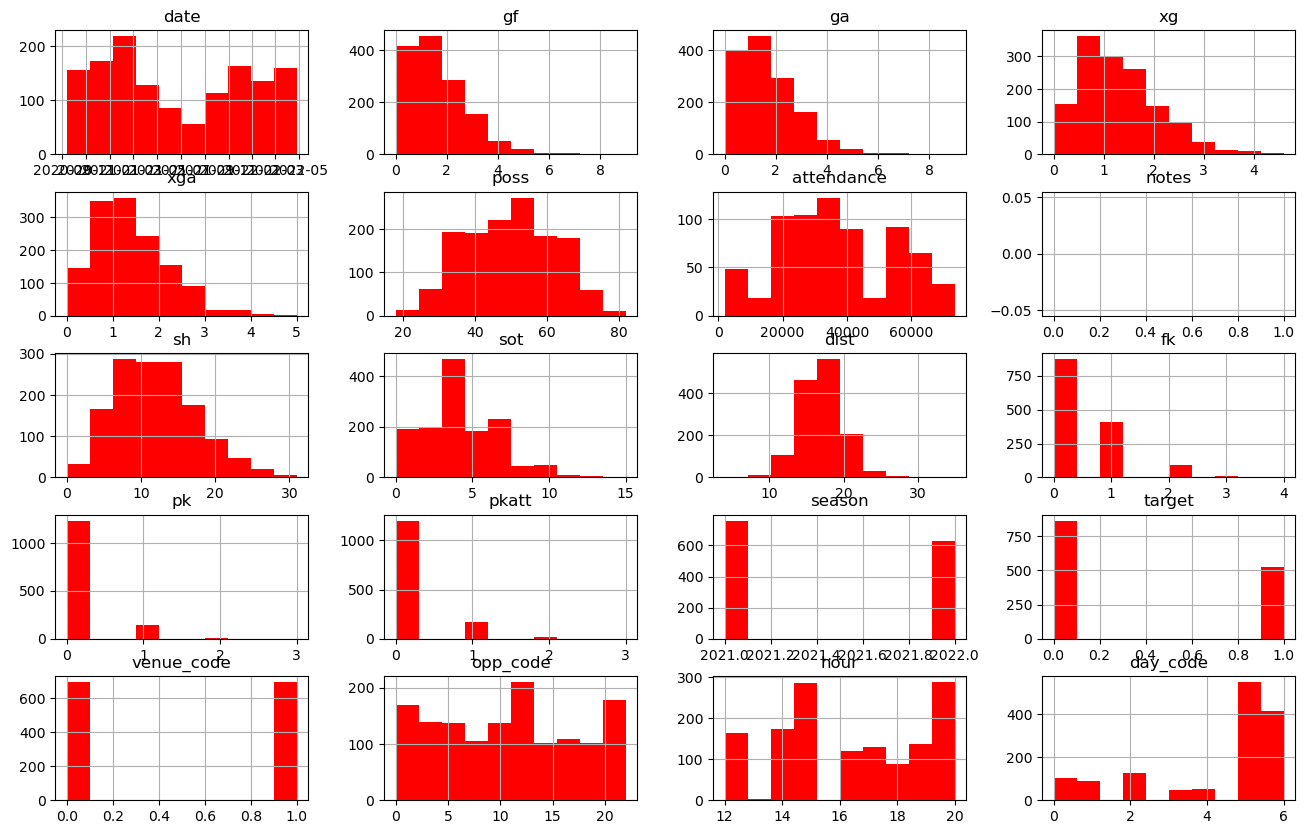

In [88]:
matches.hist(figsize=(16,10),color='red');

In [5]:
matches.shape

(1389, 27)

In [6]:
# 2 seasons * 20 squads * 38 matches

2 * 20 * 38

1520

In [7]:
# Missing Liverpool 2021-2022
matches["team"].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [8]:
matches[matches["team"] == "Liverpool"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,...,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


In [9]:
matches["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

In [10]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [11]:
del matches["comp"]


In [12]:
matches["date"] = pd.to_datetime(matches["date"])


In [13]:
matches["target"] = (matches["result"] == "W").astype("int")


In [14]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,notes,sh,sot,dist,fk,pk,pkatt,season,team,target
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,1
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,0
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,1
41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.8,...,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0


In [15]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes


In [16]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes


In [17]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")


In [18]:
matches["day_code"] = matches["date"].dt.dayofweek


In [19]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,1.0,0.0,0.0,2022,Manchester City,0,0,18,16,6
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,1.0,0.0,0.0,2022,Manchester City,1,1,15,15,5
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,0.0,0.0,0.0,2022,Manchester City,1,1,0,12,5
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,0.0,0.0,0.0,2022,Manchester City,1,0,10,15,5
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,1.0,0.0,0.0,2022,Manchester City,0,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,0.0,0.0,0.0,2021,Sheffield United,0,0,18,19,6
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,1.0,0.0,0.0,2021,Sheffield United,0,1,6,15,5
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,0.0,0.0,0.0,2021,Sheffield United,1,0,7,19,6
41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,0.8,...,1.0,0.0,0.0,2021,Sheffield United,0,0,14,18,2


In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)


In [22]:
train = matches[matches["date"] < '2022-01-01']


In [23]:
test = matches[matches["date"] > '2022-01-01']


In [24]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]


In [25]:
rf.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [26]:
RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [27]:
preds = rf.predict(test[predictors])


In [28]:
from sklearn.metrics import accuracy_score


In [29]:
error = accuracy_score(test["target"], preds)

In [30]:
error

0.6123188405797102

In [31]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))


In [32]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,141,31
1,76,28


In [33]:
from sklearn.metrics import precision_score

precision_score(test["target"], preds)

0.4745762711864407

In [34]:
grouped_matches = matches.groupby("team")

In [35]:
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [36]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group


In [37]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,1.5,...,17,5,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,1.1,...,12,5,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,1.5,...,12,5,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,1.6,...,16,6,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,1.3,...,17,5,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,2.3,...,20,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,1.8,...,15,5,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,2.0,...,16,6,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000
49,2022-04-20,20:00,Matchweek 30,Wed,Home,W,3.0,0.0,Brighton,1.2,...,20,2,1.333333,0.666667,15.666667,4.666667,16.700000,0.333333,0.000000,0.000000


In [84]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))


In [39]:
matches_rolling

date   time         round  day venue result  \
team                                                                           
Arsenal                 6  2020-10-04  14:00   Matchweek 4  Sun  Home      W   
                        7  2020-10-17  17:30   Matchweek 5  Sat  Away      L   
                        9  2020-10-25  19:15   Matchweek 6  Sun  Home      L   
                        11 2020-11-01  16:30   Matchweek 7  Sun  Away      W   
                        13 2020-11-08  19:15   Matchweek 8  Sun  Home      L   
...                               ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Matchweek 29  Sun  Away      W   
                        33 2022-03-18  20:00  Matchweek 30  Fri  Home      L   
                        34 2022-04-02  15:00  Matchweek 31  Sat  Home      W   
                        35 2022-04-08  20:00  Matchweek 32  Fri  Away      L   
                        36 2022-04-24  14:00  Matchweek 34  Sun  Away      L   

                             gf   ga         opponent   xg  ...  hour  \
team                                                        ...         
Arsenal                 6   2.0  1.0    Sheffield Utd  0.4  ...    14   
                        7   0.0  1.0  Manchester City  0.9  ...    17   
                        9   0.0  1.0   Leicester City  0.9  ...    19   
                        11  1.0  0.0   Manchester Utd  1.1  ...    16   
                        13  0.0  3.0      Aston Villa  1.5  ...    19   
...                         ...  ...              ...  ...  ...   ...   
Wolverhampton Wanderers 32  1.0  0.0          Everton  0.8  ...    14   
                        33  2.0  3.0     Leeds United  0.8  ...    20   
                        34  2.0  1.0      Aston Villa  1.2  ...    15   
                        35  0.0  1.0    Newcastle Utd  0.3  ...    20   
                        36  0.0  1.0          Burnley  0.7  ...    14   

                            day_code  gf_rolling ga_rolling sh_rolling  \
team                                                                     
Arsenal                 6          6    2.000000   1.333333   7.666667   
                        7          5    1.666667   1.666667   5.333333   
                        9          6    1.000000   1.666667   7.000000   
                        11         6    0.666667   1.000000   9.666667   
                        13         6    0.333333   0.666667   9.666667   
...                              ...         ...        ...        ...   
Wolverhampton Wanderers 32         6    1.333333   1.000000  12.333333   
                        33         4    1.666667   0.666667  12.333333   
                        34         5    2.333333   1.000000  13.000000   
                        35         4    1.666667   1.333333  13.000000   
                        36         6    1.333333   1.666667  10.000000   

                           sot_rolling dist_rolling  fk_rolling  pk_rolling  \
team                                                                          
Arsenal                 6     3.666667    14.733333    0.666667    0.000000   
                        7     3.666667    15.766667    0.000000    0.000000   
                        9     3.666667    16.733333    0.666667    0.000000   
                        11    4.000000    16.033333    1.000000    0.000000   
                        13    2.666667    18.033333    1.000000    0.333333   
...                                ...          ...         ...         ...   
Wolverhampton Wanderers 32    3.666667    19.300000    0.000000    0.000000   
                        33    4.333333    19.600000    0.000000    0.000000   
                        34    5.333333    19.833333    0.000000    0.000000   
                        35    5.000000    18.533333    0.000000    0.000000   
                        36    4.666667    17.633333    0.000000    0.000000   

                            pkatt_rolling  
team   

In [40]:
matches_rolling = matches_rolling.droplevel('team')


<AxesSubplot:xlabel='result', ylabel='Count'>

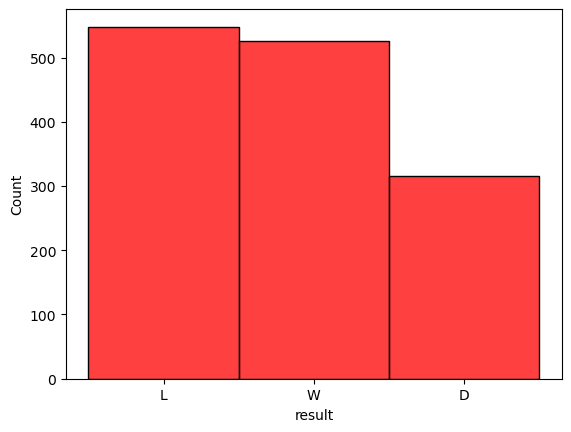

In [76]:
sns.histplot(matches.result,color='red')

In [41]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,...,14,6,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,5,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,...,19,6,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,...,16,6,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,6,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,0.8,...,14,6,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,...,20,4,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,...,15,5,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,0.3,...,20,4,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='ga', ylabel='Density'>

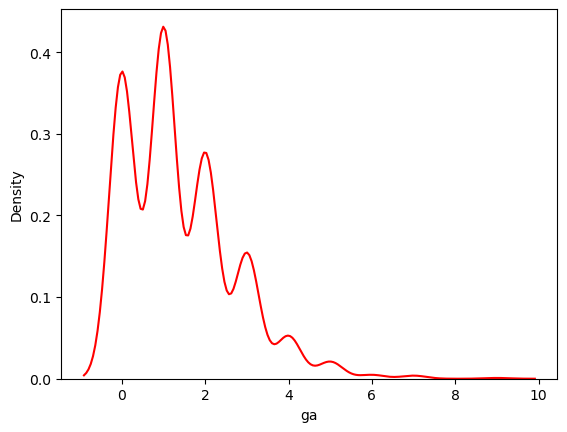

In [85]:
sns.kdeplot(data=matches.ga,color='red')

In [42]:
matches_rolling.index = range(matches_rolling.shape[0])

In [43]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [44]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)


In [45]:
error

0.625

In [46]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)


In [47]:
combined.head(10)

,actual,predicted,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
60,1,1,2022-03-13,Arsenal,Leicester City,W
61,0,1,2022-03-16,Arsenal,Liverpool,L
62,1,0,2022-03-19,Arsenal,Aston Villa,W
63,0,0,2022-04-04,Arsenal,Crystal Palace,L
64,0,0,2022-04-09,Arsenal,Brighton,L


In [48]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"} 
mapping = MissingDict(**map_values)

In [49]:
combined["new_team"] = combined["team"].map(mapping)


In [50]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])


In [51]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


<AxesSubplot:xlabel='target', ylabel='Density'>

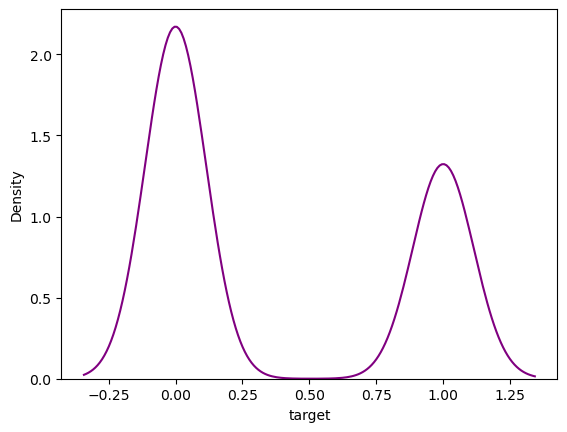

In [71]:
sns.kdeplot(data=matches.target,color='purple')

In [64]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

1    27
0    13
Name: actual_x, dtype: int64

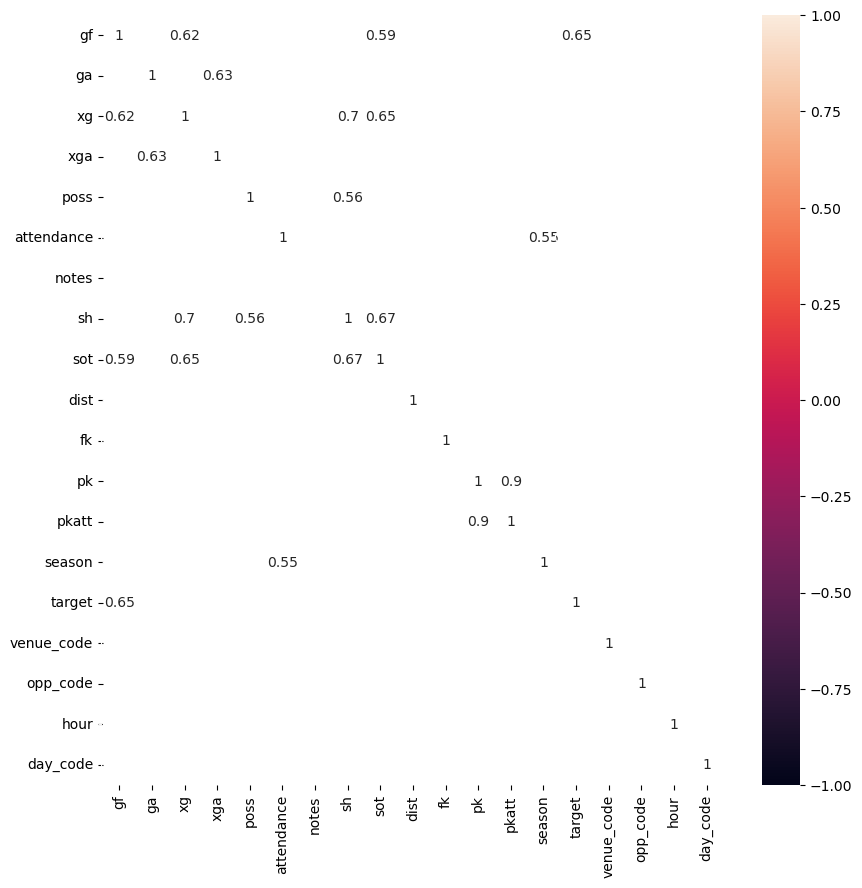

In [67]:
plt.figure(figsize=(10,10))
heat_map=matches.corr()
sns.heatmap(heat_map,vmin=-1,vmax=1,annot=True, linewidth=30)
plt.show()


<AxesSubplot:xlabel='attendance', ylabel='Density'>

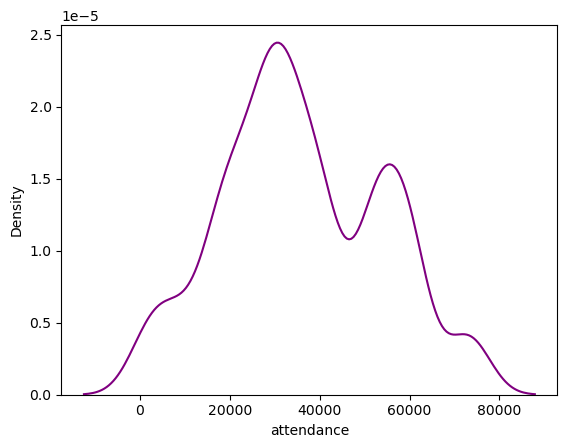

In [70]:
sns.kdeplot(data=matches.attendance,color='purple')

<AxesSubplot:xlabel='ga', ylabel='Count'>

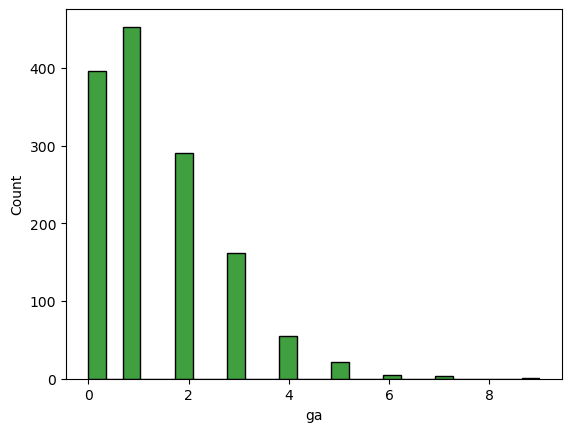

In [74]:
sns.histplot(matches.ga,color='green')

<AxesSubplot:>

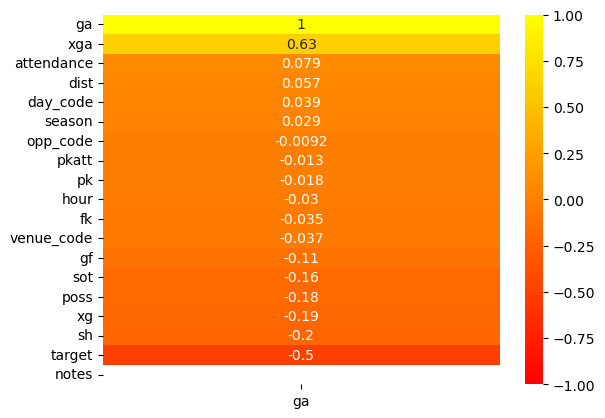

In [93]:
sns.heatmap(matches.corr()[["ga"]].sort_values(by="ga", ascending=False), vmin=-1, vmax=1, annot=True,cmap="autumn")

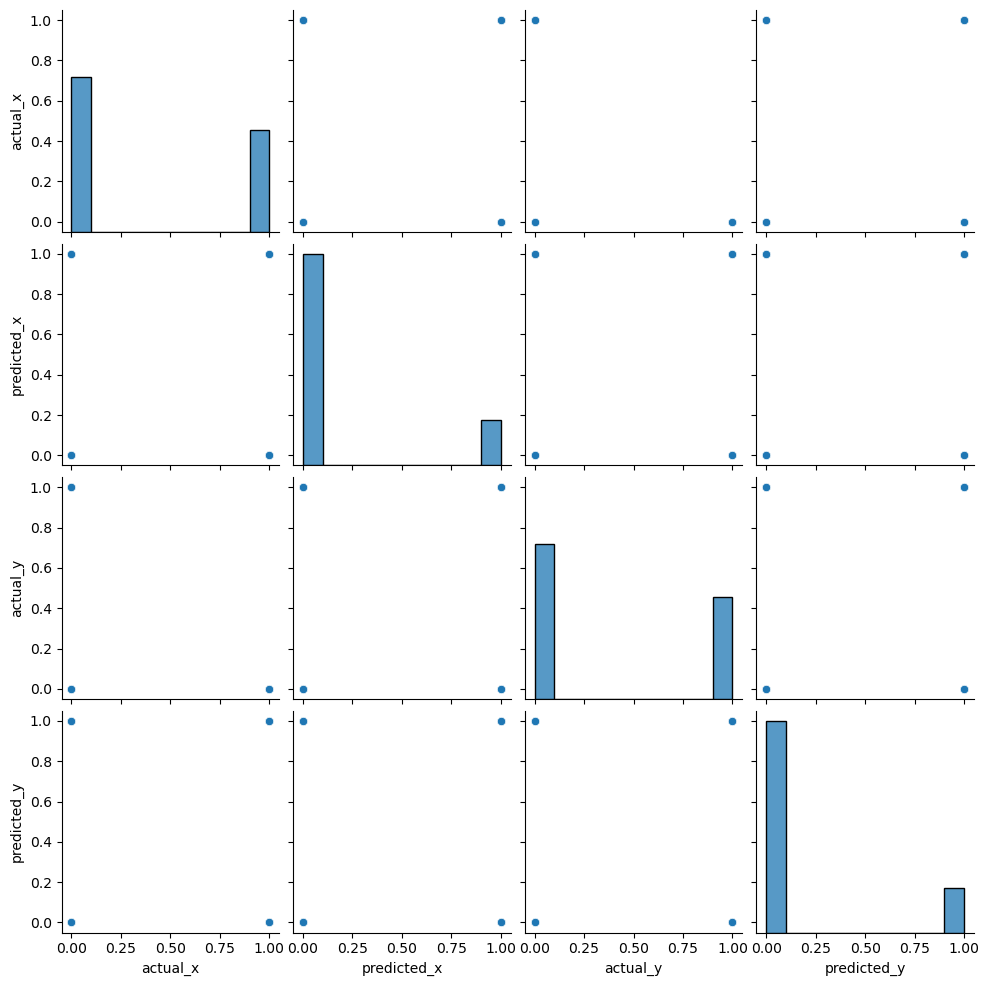

In [97]:
sns.pairplot(data=merged)
plt.show()